**Capstone Project**

The objective of the project is to perform prediction of HDB resale prices in Singapore using Machine Learning Algorithms. History HDB resalre price from 2012 - Jun2021.

Created: 31/7/2021

In this notebook:

1. Data Loading
2. Exploratory Data Analysis

   2.1 By Flat Type
   
   2.2 By Town
   
   2.3 By Storey
   
   2.4 By Floor Area
   
   2.5 By Block Number
   
   2.6 By Flat Model





In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# hide warning message
import warnings
warnings.filterwarnings('ignore')

In [4]:
# hide tensorflow waring messages
import logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [5]:
# change working director
%cd '/content/drive/MyDrive/SDAAI/Capstone Project'

/content/drive/MyDrive/SDAAI/Capstone Project


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [7]:
hdbprice2017 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
hdbprice2016 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
hdbprice2014 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
cpi = pd.read_csv('CPI.csv')

In [8]:
hdbprice2017.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [9]:
cpi.head()

,month,cpi
0,1961-01,24.542
1,1961-02,24.565
2,1961-03,24.585
3,1961-04,24.187
4,1961-05,24.053


In [10]:
hdbprice = pd.concat([hdbprice2014, hdbprice2016, hdbprice2017], axis=0, ignore_index=True, sort=False)
# To datetime
hdbprice['month'] = pd.to_datetime(hdbprice['month'])
hdbprice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192577 entries, 0 to 192576
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                192577 non-null  datetime64[ns]
 1   town                 192577 non-null  object        
 2   flat_type            192577 non-null  object        
 3   block                192577 non-null  object        
 4   street_name          192577 non-null  object        
 5   storey_range         192577 non-null  object        
 6   floor_area_sqm       192577 non-null  float64       
 7   flat_model           192577 non-null  object        
 8   lease_commence_date  192577 non-null  int64         
 9   resale_price         192577 non-null  float64       
 10  remaining_lease      140374 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 16.2+ MB


In [11]:
hdbprice[~hdbprice.isnull().any(axis=1)]['month'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

**Clean data source**

In [12]:
# Flat type cleaning
hdbprice['flat_type'] = hdbprice['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
hdbprice['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', '1 ROOM'], dtype=object)

**HDB Flat Type:**

**2-room Flexi flat**
The 2-room Flexi Scheme unifies the Studio Apartment (SA) and 2-room flat schemes. It can accommodate different buyers like families, singles, and elderly, and offers a choice of lease and fittings. It also supports inclusive living. 

**Flat features**

About 36 square metres (Type 1) and 45 square metres (Type 2)
1 bedroom
1 bathroom
Kitchen
Storeroom-cum-apartment shelter

**3-room flat**
3-room flats are ideal for families that are looking for a cosy and compact home. 

**Flat features**

About 60 to 65 square metres
2 bedrooms, 1 of which is a master bedroom with attached bathroom
Kitchen
Living/ dining area
Common bathroom
Service yard
Storeroom-cum-apartment shelter


**4-room flat**

Our 4-room flats provide families with a versatile and comfortable living space. 

**Flat features**

About 90 square metres
3 bedrooms, 1 of which is a master bedroom with attached bathroom
Living/ dining area
Kitchen
Common bathroom
Service yard
Storeroom-cum-apartment shelter

**5-room flat**

Larger households can consider our 5-room flats, which are more spacious.

**Flat features**

About 110 square metres
3 bedrooms, 1 of which is a master bedroom with attached bathroom
Living/ dining area
Kitchen
Common bathroom
Service yard
Storeroom-cum-apartment shelter
3Gen flat
3Gen flats are designed to meet the needs of multi-generation families. 

Flat features

About 115 square metres
4 bedrooms, 2 of which have attached bathrooms
Living/ dining area
Kitchen
Common bathroom
Service yard
Storage-cum-apartment shelter
Executive flat
Our Executive flats feature an additional space for a study room. 
Flat features

About 130 square metres
Living area
Dining area
Kitchen
1 master bedroom with attached bathroom
2 additional bedrooms
Common bathroom
Storeroom-cum-apartment shelter

In [13]:
hdbprice['flat_model'].value_counts()

Model A                   59382
Improved                  49110
New Generation            29519
Premium Apartment         19624
Simplified                 9096
Apartment                  7738
Standard                   6260
Maisonette                 5587
Model A2                   2624
DBSS                       2189
Model A-Maisonette          329
Adjoined flat               329
Type S1                     316
Type S2                     154
Terrace                     123
Multi Generation             78
Premium Apartment Loft       69
Improved-Maisonette          26
Premium Maisonette           17
2-room                        7
Name: flat_model, dtype: int64

In [14]:
hdbprice['storey_range'].unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [15]:
hdbprice['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
# rename town
replace_values = {'ANG MO KIO': 'Ang Mo Kio', 'BEDOK': 'Bedok', 'BISHAN': 'Bishan', 'BUKIT BATOK': 'Bukit Batok', 'BUKIT MERAH': 'Bukit Merah',
       'BUKIT PANJANG': 'Bukit Panjang', 'BUKIT TIMAH': 'Bukit Timah', 'CENTRAL AREA': 'Central Area', 'CHOA CHU KANG': 'Choa Chu Kang',
       'CLEMENTI': 'Clementi', 'GEYLANG': 'Geylang', 'HOUGANG': 'Hougang', 'JURONG EAST': 'Jurong East', 'JURONG WEST': 'Jurong West',
       'KALLANG/WHAMPOA': 'Kallang/Whampoa', 'MARINE PARADE': 'Marine Parade', 'PASIR RIS': 'Pasir Ris', 'PUNGGOL': 'Punggol',
       'QUEENSTOWN': 'Queenstown', 'SEMBAWANG': 'Sembawang', 'SENGKANG': 'Sengkang', 'SERANGOON': 'Serangoon', 'TAMPINES': 'Tampines',
       'TOA PAYOH': 'Toa Payoh', 'WOODLANDS': 'Woodlands', 'YISHUN': 'Yishun'}

hdbprice = hdbprice.replace({'town': replace_values})
hdbprice['town'].unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Bukit Timah', 'Central Area', 'Choa Chu Kang',
       'Clementi', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
       'Kallang/Whampoa', 'Marine Parade', 'Pasir Ris', 'Punggol',
       'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon', 'Tampines',
       'Toa Payoh', 'Woodlands', 'Yishun'], dtype=object)

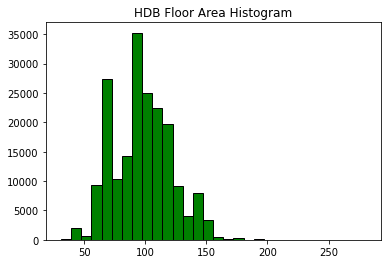

Terrace               10
Maisonette             3
Premium Maisonette     2
Name: flat_model, dtype: int64

In [17]:
plt.hist(hdbprice['floor_area_sqm'], color = 'green', bins=30, edgecolor='black')
plt.title('HDB Floor Area Histogram')
plt.show()
display(hdbprice[hdbprice['floor_area_sqm'] > 200]['flat_model'].value_counts())

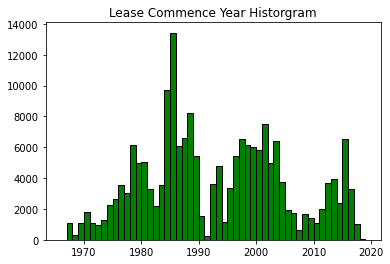

In [18]:
bins = hdbprice['lease_commence_date'].max() - hdbprice['lease_commence_date'].min()
plt.hist(hdbprice['lease_commence_date'], bins=bins, color = 'green', edgecolor = 'black')
plt.title('Lease Commence Year Historgram')
plt.show()

In [19]:
cpi['month'] = pd.to_datetime(cpi['month'])
hdbprice = hdbprice.merge(cpi, on='month', how='left')
hdbprice['real_price'] = (hdbprice['resale_price'] / hdbprice['cpi']) * 100

**Median HDB Resale Price Over the Years**

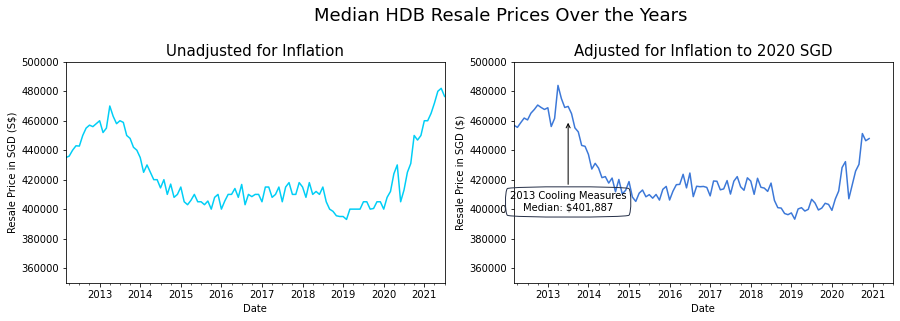

In [20]:
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
hdbprice.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD (S$)'), ax1.set_ylim(350000, 500000), 
ax1.set_title('Unadjusted for Inflation', size =15)

#adjusted
ax2 = fig.add_subplot(122)
hdbprice.groupby('month')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(350000, 500000), 
ax2.set_title('Adjusted for Inflation to 2020 SGD', size=15)
ax2.annotate('2013 Cooling Measures\nMedian: $401,887', xy=('2013-07-01',460000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 

plt.show()
#prices.set_index('month').loc['1997']['real_price'].median()

In 2013, it has experienced a decline due to 'Property Market Cooling Measures', such as teh additional Buyer's Stamp Duty (ABSD), Loan-to-Value (LTV) Ratio, and Total Debt Servicing Ratio (TDSR). Refer [here](https://www.srx.com.sg/cooling-measures) for details information.

In [21]:
# Convert remaining_lease to number of years

def get_years(text):
  if isinstance(text, str):
    yearmonth = [int(s) for s in text.split() if s.isdigit()]
    if len(yearmonth) > 1:
      years = yearmonth[0] + (yearmonth[1]/12)
    else:
      years = yearmonth[0]
      return years
  else:
    return text

hdbprice['remaining_lease'] = hdbprice['remaining_lease'].apply(lambda x: get_years(x))

In [22]:
hdbprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192577 entries, 0 to 192576
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                192577 non-null  datetime64[ns]
 1   town                 192577 non-null  object        
 2   flat_type            192577 non-null  object        
 3   block                192577 non-null  object        
 4   street_name          192577 non-null  object        
 5   storey_range         192577 non-null  object        
 6   floor_area_sqm       192577 non-null  float64       
 7   flat_model           192577 non-null  object        
 8   lease_commence_date  192577 non-null  int64         
 9   resale_price         192577 non-null  float64       
 10  remaining_lease      45551 non-null   float64       
 11  cpi                  176946 non-null  float64       
 12  real_price           176946 non-null  float64       
dtypes: datetime64[

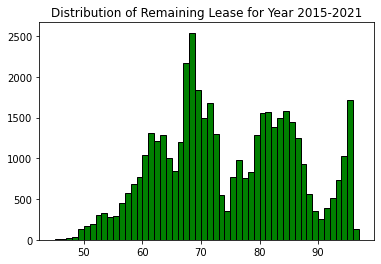

In [23]:
bins = hdbprice['remaining_lease'].max() - hdbprice ['remaining_lease'].min()
plt.hist(hdbprice['remaining_lease'], bins = int(bins), color='green', edgecolor='black')
plt.title('Distribution of Remaining Lease for Year 2015-2021')
plt.show()

In [24]:
hdbprice.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price
0,2012-03-01,Ang Mo Kio,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN,95.207,262585.734242
1,2012-03-01,Ang Mo Kio,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN,95.207,278340.878297
2,2012-03-01,Ang Mo Kio,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN,95.207,330858.025145
3,2012-03-01,Ang Mo Kio,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN,95.207,336109.739830
4,2012-03-01,Ang Mo Kio,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN,95.207,337160.082767


## **Exploratory Data Analysis**

**By Flat Type**

In [25]:
!pip install pywaffle matplotlib

     |████████████████████████████████| 526 kB 4.9 MB/s 


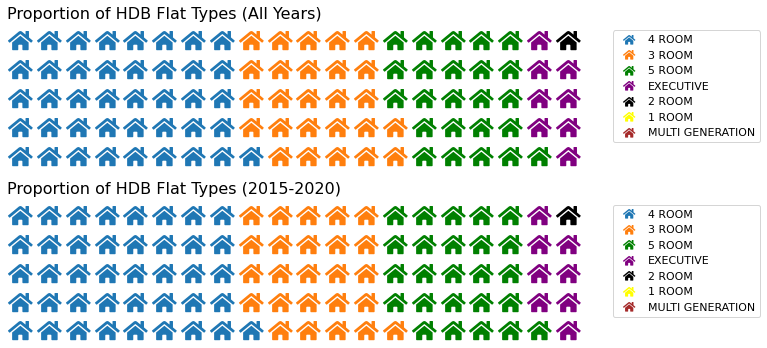

In [26]:
# Waffle chart for flat type - number of rooms
from pywaffle import  Waffle

flattype = dict(hdbprice['flat_type'].value_counts()/len(hdbprice)*100)
flattype1520 = dict(hdbprice.set_index('month')['2015':'2020'].reset_index()['flat_type'].value_counts()/len(hdbprice.set_index
('month')['2015':'2020'].reset_index())*100)

plt.figure(figsize=(10,5),
    FigureClass=Waffle, 
    plots={
        '211': {
            'values': flattype,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':11},
            'title': {'label': 'Proportion of HDB Flat Types (All Years)', 'loc': 'left', 'fontsize':16}
        },
        '212': {
            'values': flattype1520,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':11},
            'title': {'label': 'Proportion of HDB Flat Types (2015-2020)', 'loc': 'left', 'fontsize':16}            
        },
    },
    rows=5, 
    colors=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'],
    #colors=["#3c78d8", "#00cef6", "#aff000", '#28324a', 'black', 'yellow', 'brown'],
    icons='home', 
    font_size=22, 
    icon_legend=True)
    
plt.show()

There are not many 1 Room, 2 Room and Multi-Generation flats, so they will be removed for looking at flat types.

In [27]:
flattype = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
hdbprice1520 = hdbprice.set_index('month').sort_index().loc['2015-01':'2020-12']
hdbprice1520 = hdbprice1520[hdbprice1520['flat_type'].isin(flattype)][['flat_type','real_price']].reset_index()
hdbprice1520['flat_type_year'] = hdbprice1520['flat_type'] + ' - ' + hdbprice1520['month'].apply(lambda x: str(x)[:4])
hdbprice1520

,month,flat_type,real_price,flat_type_year
0,2015-01-01,3 ROOM,257279.496338,3 ROOM - 2015
1,2015-01-01,3 ROOM,277458.280364,3 ROOM - 2015
2,2015-01-01,3 ROOM,287547.672377,3 ROOM - 2015
3,2015-01-01,3 ROOM,292592.368384,3 ROOM - 2015
4,2015-01-01,3 ROOM,292592.368384,3 ROOM - 2015
...,...,...,...,...
122954,2020-12-01,EXECUTIVE,557385.860315,EXECUTIVE - 2020
122955,2020-12-01,EXECUTIVE,537479.222447,EXECUTIVE - 2020
122956,2020-12-01,EXECUTIVE,635021.748002,EXECUTIVE - 2020
122957,2020-12-01,EXECUTIVE,680309.349152,EXECUTIVE - 2020


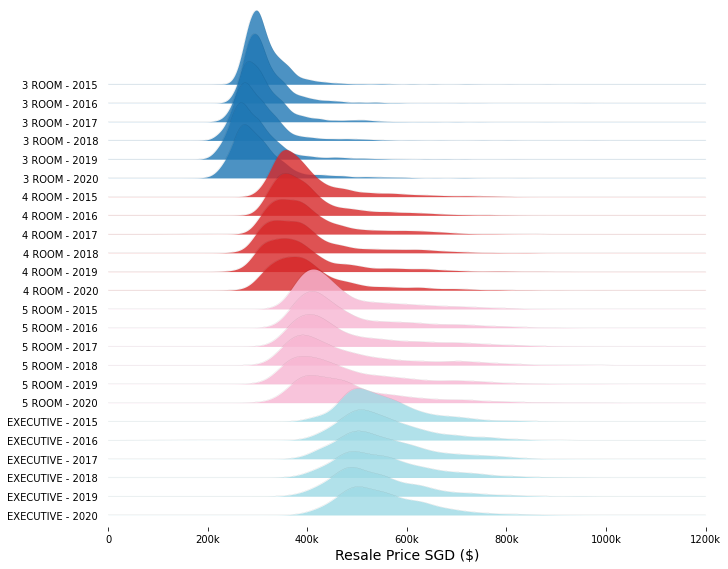

In [28]:
# ridgeline plot for looking at distribution of flat types by year
!pip install joypy matplotlib
import joypy
fig, axes = joypy.joyplot(hdbprice1520, by="flat_type_year", column="real_price",figsize=(10,8),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)
fig.show()

No much changes wihtin each flat type through the last 7 years. The consistent is the HDB prices become higher as flats have more rooms

**By Town**

In [52]:
## 2015 to 2020
hdbprice['year'] = pd.DatetimeIndex(hdbprice['month']).year # extract out year
hdbprice1520 = hdbprice[hdbprice['year'].isin([2015,2016,2017,2018,2019,2020])].groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
hdbprice1520['real_price'] = round(hdbprice1520['real_price']/1000)
hdbprice1520['color'] = ['#f8766d'] + ['#3c78d8']*(len(hdbprice1520)-2) + ['#00ba38']

# 4-room
hdbprice1520_4room = hdbprice[(hdbprice['flat_type'].isin(['4 ROOM'])) & (hdbprice['year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
hdbprice1520_4room['real_price'] = round(hdbprice1520_4room['real_price']/1000)
hdbprice1520_4room['color'] = ['#f8766d','#f8766d'] + ['#3c78d8']*(len(hdbprice1520_4room)-3) + ['#00ba38']

## 2013 vs 2020
# all room type
hdbprice1320 = hdbprice[hdbprice['year'].isin([2013,2020])].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
hdbprice1320['change'] = hdbprice1320.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
hdbprice1320 = hdbprice1320[hdbprice1320['change'].notnull()] 
hdbprice1320 = hdbprice1320.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
hdbprice1320['color'] = hdbprice1320['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4-room
hdbprice1320_4room = hdbprice[(hdbprice['flat_type'].isin(['4 ROOM']) & hdbprice['year'].isin([2013,2020]))].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
hdbprice1320_4room['change'] = hdbprice1320_4room.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
hdbprice1320_4room = hdbprice1320_4room[hdbprice1320_4room.change.notnull()]
hdbprice1320_4room = hdbprice1320_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
hdbprice1320_4room['color'] = hdbprice1320_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

## 2018 vs 2019
# all room type
hdbprice1819 = hdbprice[hdbprice['year'].isin([2018,2019])].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
hdbprice1819['change'] = hdbprice1819.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
hdbprice1819 = hdbprice1819[hdbprice1819['change'].notnull()] 
hdbprice1819 = hdbprice1819.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
hdbprice1819['color'] = hdbprice1819['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4-room
hdbprice1819_4room = hdbprice[(hdbprice['flat_type'].isin(['4 ROOM']) & hdbprice['year'].isin([2018,2019]))].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
hdbprice1819_4room['change'] = hdbprice1819_4room.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
hdbprice1819_4room = hdbprice1819_4room[hdbprice1819_4room.change.notnull()]
hdbprice1819_4room = hdbprice1819_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
hdbprice1819_4room['color'] = hdbprice1819_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

In [53]:
# Function for lollipop charts
def loll_plot(df, x, y, subtitle, xlabel, xlim):
    plt.rc('axes', axisbelow=True)
    plt.grid(linestyle='--', alpha=0.4)
    plt.hlines(y=df.index, xmin=0, xmax=df[x], color=df.color, linewidth=1)
    plt.scatter(df[x], df.index, color=df.color, s=300)
    for i, txt in enumerate(df[x]):
        plt.annotate(str(round(txt)), (txt, i), color='white', fontsize=9, ha='center', va='center')
    plt.annotate(subtitle, xy=(1, 0), xycoords='axes fraction', fontsize=20,
                    xytext=(-5, 5), textcoords='offset points',
                    ha='right', va='bottom')
    plt.yticks(df.index, df[y]); plt.xticks(fontsize=10); plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=16)

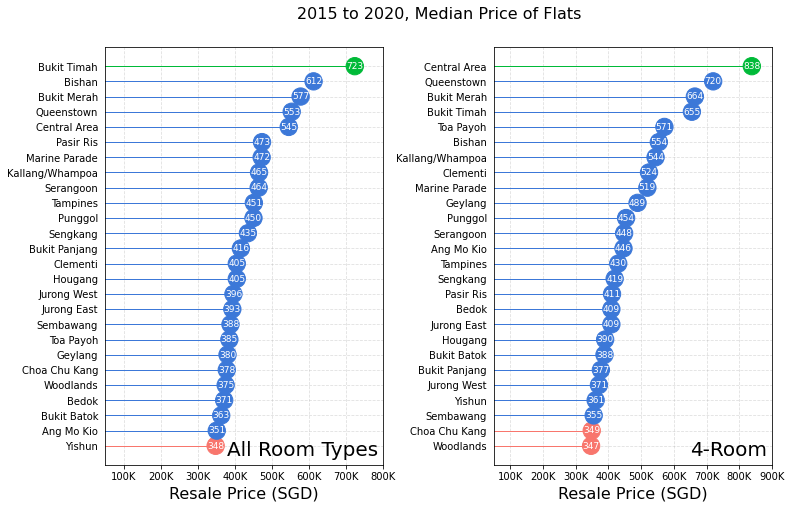

In [54]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(hdbprice1520, 'real_price', 'town', 'All Room Types', 'Resale Price (SGD)', [50,800])
ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
ax1.yaxis.set_ticks_position('none') 

ax2 = plt.subplot(122)
loll_plot(hdbprice1520_4room, 'real_price', 'town', '4-Room', 'Resale Price (SGD)', [50,900])
ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])
ax2.yaxis.set_ticks_position('none') 

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2015 to 2020, Median Price of Flats', fontsize=16)
plt.show()

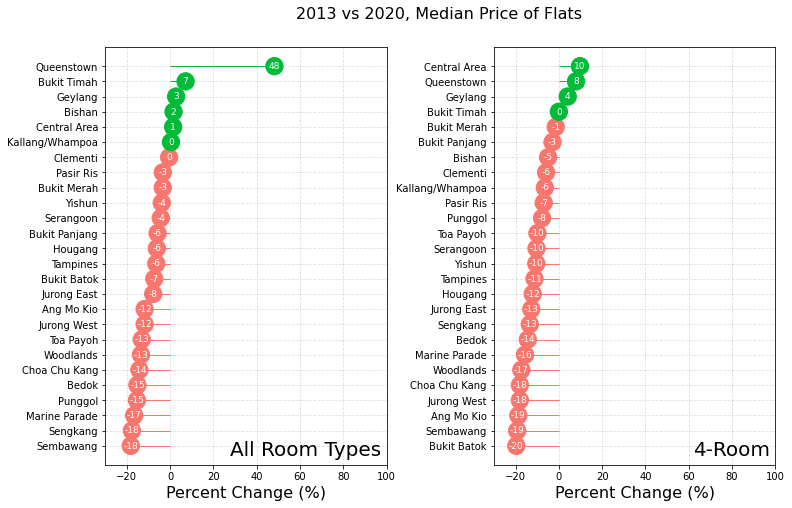

In [55]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(hdbprice1320, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-30,100])

ax2 = plt.subplot(122)
loll_plot(hdbprice1320_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-30,100])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2013 vs 2020, Median Price of Flats', fontsize=16)
plt.show()

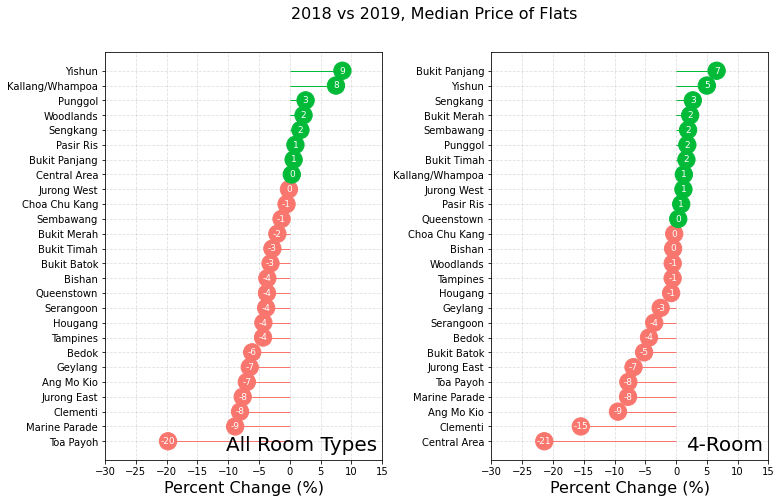

In [56]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(hdbprice1819, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-30,15])

ax2 = plt.subplot(122)
loll_plot(hdbprice1819_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-30,15])

fig.tight_layout(pad=0.5, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2018 vs 2019, Median Price of Flats', fontsize=16)
plt.show()

In [57]:
hdbprice[hdbprice['year'].isin([2018,2019])].groupby('town')['lease_commence_date'].median().sort_values()

town
Marine Parade      1975
Ang Mo Kio         1980
Bedok              1980
Clementi           1980
Kallang/Whampoa    1982
Geylang            1982
Toa Payoh          1984
Jurong East        1984
Central Area       1984
Serangoon          1986
Bukit Merah        1986
Bukit Batok        1986
Yishun             1988
Bukit Timah        1988
Bishan             1988
Tampines           1988
Hougang            1989
Pasir Ris          1993
Queenstown         1995
Choa Chu Kang      1996
Jurong West        1997
Woodlands          1997
Bukit Panjang      1999
Sembawang          2001
Sengkang           2006
Punggol            2013
Name: lease_commence_date, dtype: int64

**By Storey**

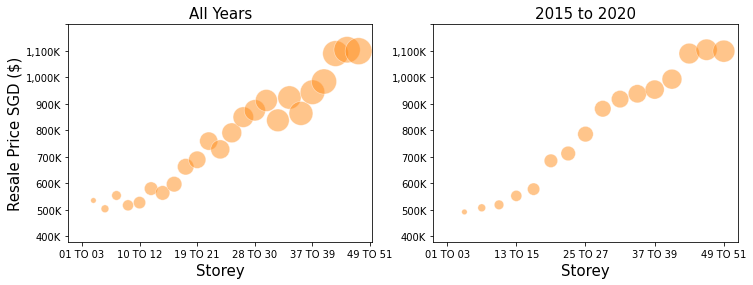

In [58]:
fig = plt.figure(figsize=(12,4))

# Storey Prices
ax1 = plt.subplot(121)
storey = hdbprice.groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['storey_rank'], y=storey['real_price'], s=storey['storey_rank'].astype('int')*30, color='#FF8C19', edgecolors='w', alpha=0.5, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)

# Floor Area Prices
ax2 = plt.subplot(122)
storey2 = hdbprice[hdbprice['year'].isin([2015,2016,2017,2018,2019,2020])].groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey2['storey_rank'] = storey2['storey_range'].astype('category').cat.codes

# Bubble chart
b=sns.scatterplot(x=storey2['storey_rank'], y=storey2['real_price'], s=storey2['storey_rank'].astype('int')*30, color='#FF8C19', edgecolors='w', alpha=0.5, ax=ax2)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels); ax2.set_ylabel('')
ax2.set_xticks([0,4,8,12,16])
ax2.set_xticklabels(storey2.iloc[[0,4,8,12,16],0])
ax2.set_ylim([280000,1100000]), ax2.set_xlabel('Storey', size=15)
ax2.set_title('2015 to 2020', size=15)

plt.show()

Follow a linear relationship, with higher storeys being sold at a higher price.

**By Floor Area**

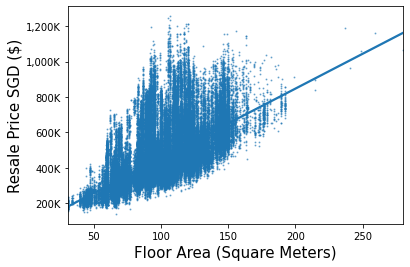

In [59]:
# Floor Area Prices
area = hdbprice[hdbprice['year'].isin([2015,2016,2017,2018,2019,2020])]
p=sns.regplot(x='floor_area_sqm', y='real_price', data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

In [60]:
display(area[area['floor_area_sqm'] > 200])


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price,year,blocknum
55316,2015-03-01,Kallang/Whampoa,3 ROOM,53,JLN MA'MOR,01 TO 03,280.0,Terrace,1972,1060000.0,56.0,99.449,1.065873e+06,2015,53
60108,2015-06-01,Kallang/Whampoa,3 ROOM,60,JLN BAHAGIA,01 TO 03,241.0,Terrace,1972,958000.0,56.0,99.171,9.660082e+05,2015,60
88693,2016-12-01,Kallang/Whampoa,3 ROOM,57,JLN MA'MOR,01 TO 03,259.0,Terrace,1972,1150000.0,54.0,98.854,1.163332e+06,2016,57
98224,2017-06-01,Kallang/Whampoa,3 ROOM,38,JLN BAHAGIA,01 TO 03,215.0,Terrace,1972,830000.0,NaN,98.956,8.387566e+05,2017,38
103305,2017-09-01,Choa Chu Kang,EXECUTIVE,641,CHOA CHU KANG ST 64,16 TO 18,215.0,Premium Maisonette,1998,888000.0,NaN,99.036,8.966436e+05,2017,641
109049,2017-12-01,Kallang/Whampoa,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,1053888.0,NaN,99.225,1.062119e+06,2017,65
110184,2018-01-01,Choa Chu Kang,EXECUTIVE,639,CHOA CHU KANG ST 64,10 TO 12,215.0,Premium Maisonette,1998,900000.0,79.0,99.035,9.087696e+05,2018,639
125153,2018-09-01,Kallang/Whampoa,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,1185000.0,NaN,99.753,1.187934e+06,2018,41


Total 8 houses have floor area sqm more than 200 sqm.

**By Block Number**

3 digit system was introduced in the 1970s, with the 1st digit representing a neighbourhood in a town. So for e.g., Woodlands neighbourhood 1 starts with 601, and Woodlands neighbourhood 2 starts with 701. So first digit was separated from last 2 digits and plotted separately

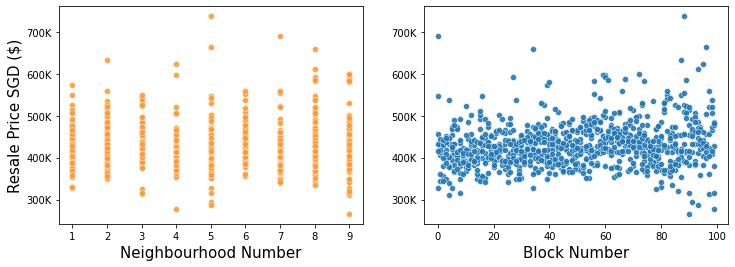

In [61]:
import re

# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
hdbprice['blocknum'] = hdbprice['block'].apply(get_num) # get only digits from block number
tmp = hdbprice[hdbprice['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['real_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['real_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['real_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

Block number doesn't seem to influence hdb prices

**By Flat Model**

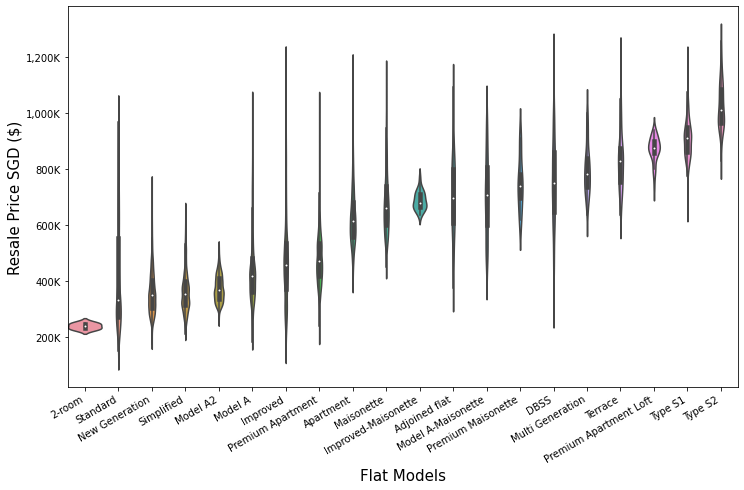

In [62]:
# Violin plots for price distribution of each flat model

fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='flat_model', y='real_price', data=hdbprice, width=1,
                order=hdbprice.groupby('flat_model')['real_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

Special models like the type S1S2 (The Pinnacle@Duxton) and terrace tend to fetch higher prices while the older models tend to go lower.

**By Lease Commence Date**

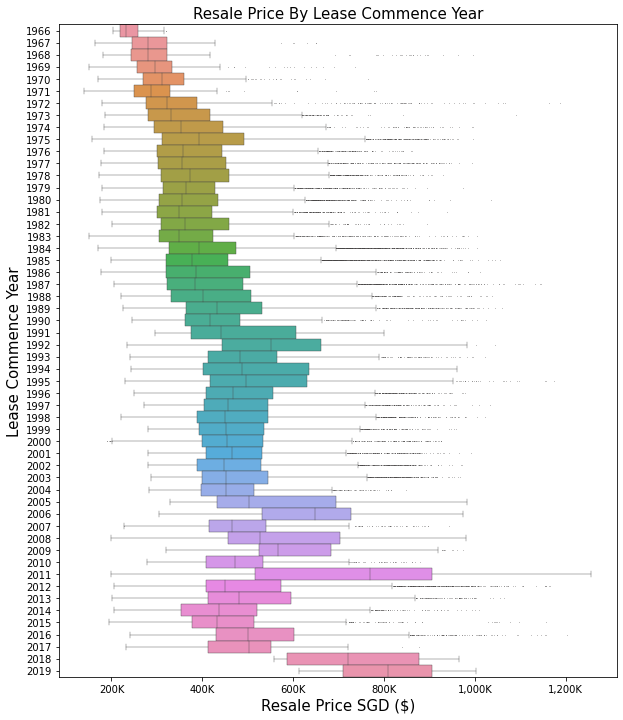

In [63]:
# Boxplot for each year of lease commence date

fig = plt.figure(figsize=(10,12))
p=sns.boxplot(y='lease_commence_date', x='real_price', data=hdbprice, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.show()

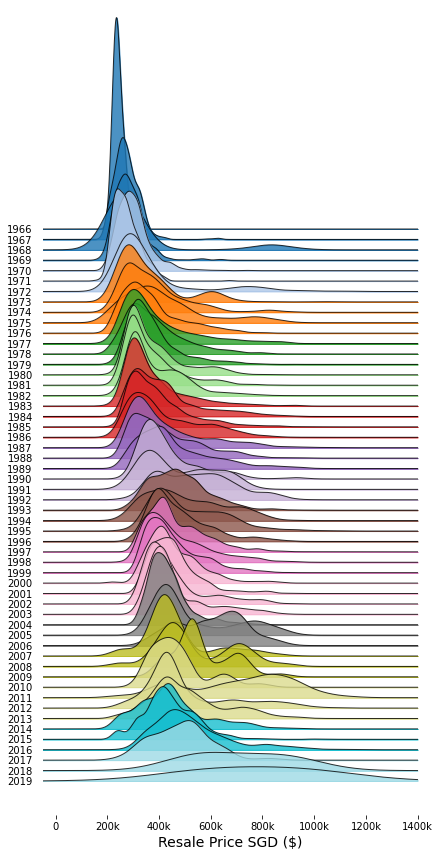

In [64]:
tmp = hdbprice[hdbprice['year'].isin([2015,2016,2017,2018,2019,2020])]
fig, axes = joypy.joyplot(tmp, by="lease_commence_date", column="real_price",figsize=(6,12),
             linewidth=1,overlap=5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))
axes[-1].set_xlim([-50000,1400000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)
fig.show()

**By Distance to Nearest Amenities**

The names of schools, supermarkets, hawkers, shopping malls, parks and MRTs were downloaded/scraped from Data.gov.sg and Wikipedia and fed through a function that uses OneMap.sg api to get their coordinates (latitude and longitude). These coordinates were then fed through other functions which uses geopy package to get the distance between locations. By doing this, the nearest distance of each amenity from each house can be computed, as well as the number of each amenity within a 2km radius of each flat.

In [67]:
flat_amenities = pd.read_csv('flat_amenities.csv')

# merge amenities data to flat data
hdbprice1520 = hdbprice[hdbprice['year'].isin([2015,2016,2017,2018,2019,2020])]
hdbprice1520['flat'] = hdbprice['block'] + ' ' + hdbprice['street_name']
hdbprice1520 = hdbprice1520.merge(flat_amenities, on='flat', how='left')

# reduce number of class of town to regions
d_region = {'Ang Mo Kio':'North East', 'Bedok':'East', 'Bishan':'Central', 'Bukit Batok':'West', 'Bukit Merah':'Central',
       'Bukit Panjang':'West', 'Bukit Timah':'Central', 'Central Area':'Central', 'Choa Chu Kang':'West',
       'Clementi':'West', 'Geylang':'Central', 'Hougang':'North East', 'Jurong East':'West', 'Jurong West':'West',
       'Kallang/Whampoa':'Central', 'Marine Parade':'Central', 'Pasir Ris':'East', 'Punggol':'North East',
       'Queenstown':'Central', 'Sembawang':'North', 'Sengkang':'North East', 'Serangoon':'North East', 'Tampines':'East',
       'Toa Payoh':'Central', 'Woodlands':'North', 'Yishun':'North'}
hdbprice1520['region'] = hdbprice1520['town'].map(d_region)
colors = {'North East':'Purple', 'East':'Green', 'Central':'Brown', 'West':'Red', 'North':'Orange'}


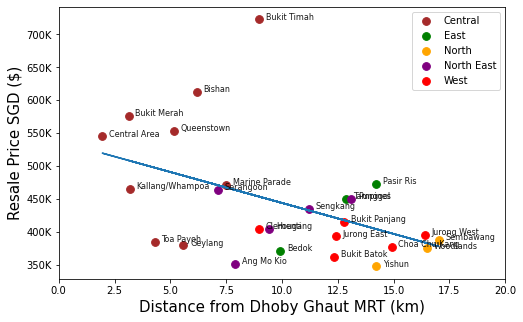

In [68]:
# get median info of each town
tmp = hdbprice1520.groupby('town')[['dist_dhoby','school_dist','num_school_2km','hawker_dist','num_hawker_2km', 'mrt_dist','num_mrt_2km','real_price']].median().reset_index()
tmp['region'] = tmp['town'].map(d_region)

# Scatterplot with names of towns
fig, ax = plt.subplots(figsize=(8,5))
grouped = tmp.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='dist_dhoby', y='real_price', label=key, color=colors[key], s=60)
b, a = np.polyfit(tmp['dist_dhoby'], tmp['real_price'], 1)
ax.plot(tmp['dist_dhoby'], a + b* tmp['dist_dhoby'], '-')  
ax.set_xlim([0,20]), ax.set_xlabel('Distance from Dhoby Ghaut MRT (km)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels), ax.set_ylabel('Resale Price SGD ($)', size=15)
for i, txt in enumerate(tmp['town']):
    ax.annotate(txt, (tmp['dist_dhoby'][i]+0.3, tmp['real_price'][i]), size=8, alpha=0.9)

plt.show()

In [69]:
hdbprice1520.groupby('region')['real_price'].median()

region
Central       505980.691777
East          433358.528597
North         369833.726809
North East    429674.862504
West          390903.087153
Name: real_price, dtype: float64

Ralationship is negative correlation, with flats further away from Shoby Ghaut MRT (Central), having lower resale prices.

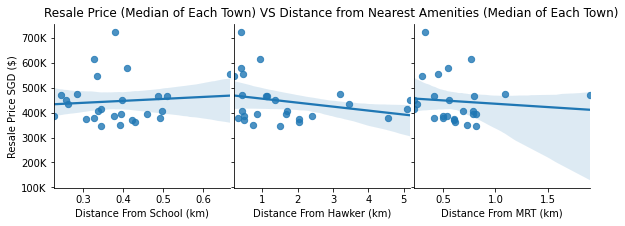

In [70]:
# scatterplot for median price of each town against nearest distance from each amenity

p=sns.pairplot(tmp, x_vars=["school_dist", "hawker_dist", "mrt_dist"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From School (km)', size=10), axes[0,1].set_xlabel('Distance From Hawker (km)', size=10)
axes[0,2].set_xlabel('Distance From MRT (km)', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Distance from Nearest Amenities (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

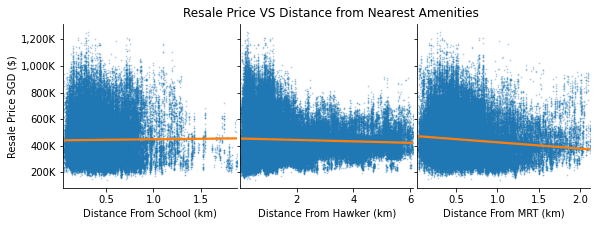

In [73]:
# scatterplot for price of each flat against nearest distance from each amenity

p=sns.pairplot(hdbprice1520[hdbprice1520['school_dist']<3], x_vars=["school_dist", "hawker_dist", "mrt_dist"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3), line_kws=dict(color='#ff7f0e'))) # remove outliers (>3km)
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From School (km)', size=10), axes[0,1].set_xlabel('Distance From Hawker (km)', size=10)
axes[0,2].set_xlabel('Distance From MRT (km)', size=10)
plt.suptitle('Resale Price VS Distance from Nearest Amenities')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

**By Number of Amenities in 2km Radius**

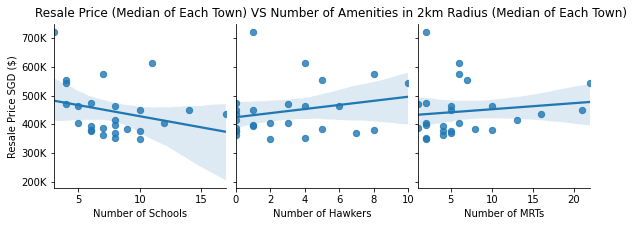

In [74]:
# scatterplot for median price of each town against number of amenities

p=sns.pairplot(tmp, x_vars=["num_school_2km", "num_hawker_2km", "num_mrt_2km"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of Schools', size=10), axes[0,1].set_xlabel('Number of Hawkers', size=10)
axes[0,2].set_xlabel('Number of MRTs', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Number of Amenities in 2km Radius (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

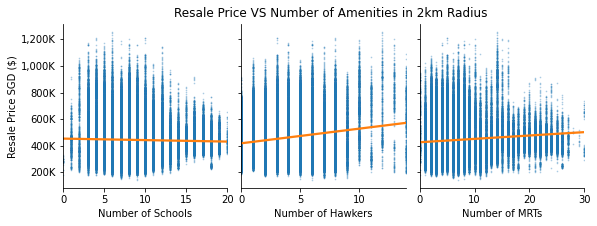

In [76]:
# scatterplot for price of each flat against number of amenities

p=sns.pairplot(hdbprice1520, x_vars=["num_school_2km", "num_hawker_2km", "num_mrt_2km"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3), line_kws=dict(color='#ff7f0e')))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of Schools', size=10), axes[0,1].set_xlabel('Number of Hawkers', size=10)
axes[0,2].set_xlabel('Number of MRTs', size=10)
plt.suptitle('Resale Price VS Number of Amenities in 2km Radius')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

**Data Preparation**

Focus on data from 2015 to 2020

In [42]:
#clear unused variables
del(hdbprice2017, hdbprice2016, hdbprice2014)
import gc
gc.collect()

54265

**Missing Values**

Replace missing distance values with median of the town. Only Kallang/Whampoa has missing data, so the function below will replace them with the median of the Kallang/Whampoa distance variables

In [77]:
df = hdbprice1520[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'year', 'school_dist', 'num_school_2km', 'hawker_dist', 'num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'dist_dhoby', 'region', 'real_price']]

# function for replacing NAs with median of the town
def replace_NA_median(df, columns):
    for c in columns:      
        df[c] = df.groupby("town").transform(lambda x: x.fillna(x.median()))[c]
    return df

df = replace_NA_median(df, ['school_dist', 'num_school_2km', 'hawker_dist',
       'num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'dist_dhoby'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124743 entries, 0 to 124742
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 124743 non-null  object 
 1   flat_type            124743 non-null  object 
 2   storey_range         124743 non-null  object 
 3   floor_area_sqm       124743 non-null  float64
 4   flat_model           124743 non-null  object 
 5   lease_commence_date  124743 non-null  int64  
 6   year                 124743 non-null  int64  
 7   school_dist          124743 non-null  float64
 8   num_school_2km       124743 non-null  float64
 9   hawker_dist          124743 non-null  float64
 10  num_hawker_2km       124743 non-null  float64
 11  mrt_dist             124743 non-null  float64
 12  num_mrt_2km          124743 non-null  float64
 13  dist_dhoby           124743 non-null  float64
 14  region               124743 non-null  object 
 15  real_price       

**Multicollinearlity**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

If our goal is one of classification or prediction and not to look at the importance or contribution of each feature, we do not need to deal with multicollinearity as it does not affect the overall prediction or goodness of fit. It just affects the p-value and the coefficients. But since we are interested in feature importance by looking at the coefficients of the linear regression model, we have to focus on it.

If the largest VIF is greater than 10 then there is cause for concern (Bowerman & O’Connell, 1990; Myers, 1990)
If the average VIF is substantially greater than 1 then the regression may be biased (Bowerman & O’Connell, 1990).
Tolerance below 0.1 indicates a serious problem.
Tolerance below 0.2 indicates a potential problem (Menard, 1995).

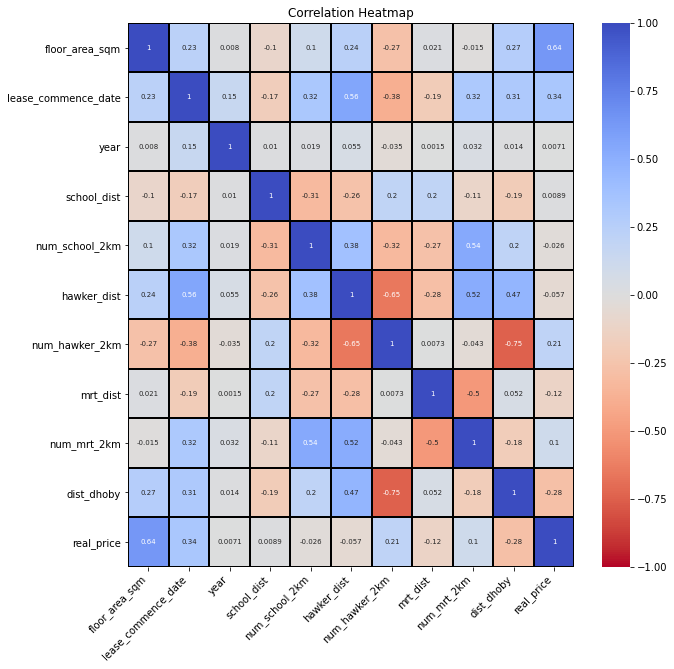

In [78]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
#ax.set_ylim(0 ,5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

In [79]:
# Multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif(df.drop('real_price',axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,floor_area_sqm,19.330023,0.051733,7866.618711
1,lease_commence_date,39629.313237,0.000025,7866.618711
2,year,38947.599896,0.000026,7866.618711
3,school_dist,4.615897,0.216643,7866.618711
4,num_school_2km,13.421047,0.074510,7866.618711
5,hawker_dist,9.907789,0.100931,7866.618711
6,num_hawker_2km,5.563497,0.179743,7866.618711
7,mrt_dist,4.991572,0.200338,7866.618711
8,num_mrt_2km,8.134352,0.122935,7866.618711
9,dist_dhoby,23.309798,0.042900,7866.618711


In [80]:
calc_vif(df.drop(['real_price','year','num_school_2km','dist_dhoby'],axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,floor_area_sqm,19.023867,0.052566,11.36253
1,lease_commence_date,34.935308,0.028624,11.36253
2,school_dist,4.213159,0.237352,11.36253
3,hawker_dist,7.998439,0.125024,11.36253
4,num_hawker_2km,3.681658,0.271617,11.36253
5,mrt_dist,4.945345,0.202210,11.36253
6,num_mrt_2km,4.739937,0.210973,11.36253


In [81]:
# drop columns
lr_df = df.drop(['year','num_school_2km','dist_dhoby'], axis=1)

There is definitely multicollinearity in our continuous features. Even after removing several features, the highest VIF is still around 50 (lease_commence_date) and floor_area_sqm is above 10 as well. I chose to left them in as I believe that they are really important contributors to resale prices. One way is to refit another model without them and compare the output.

**Normality**

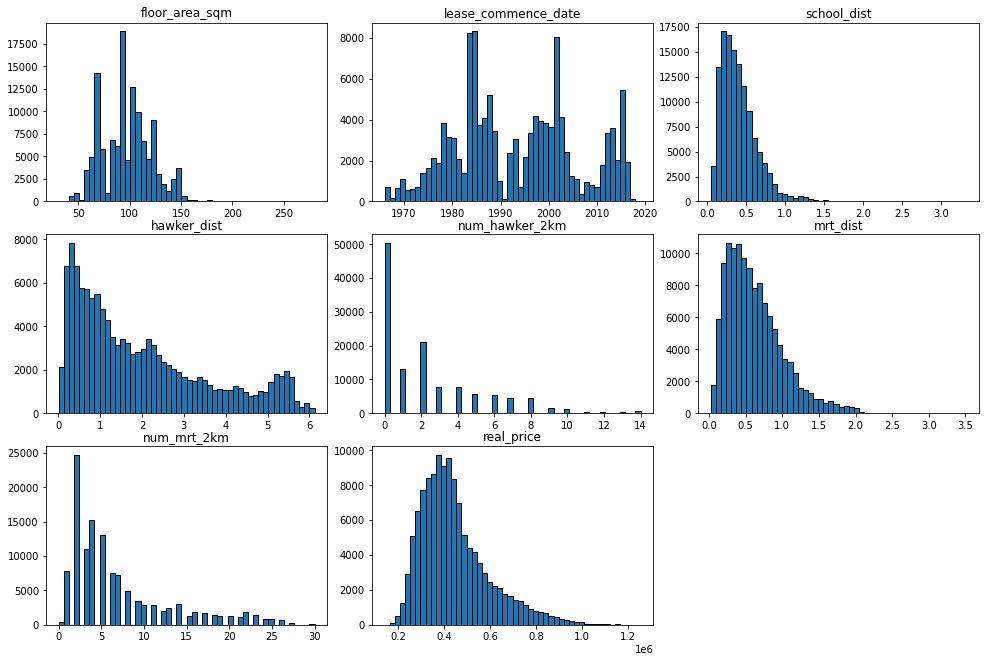

In [82]:
# Plot distribution for each continuous variable
lr_df.hist(bins=50, figsize=(15, 10), grid=False, edgecolor='black')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

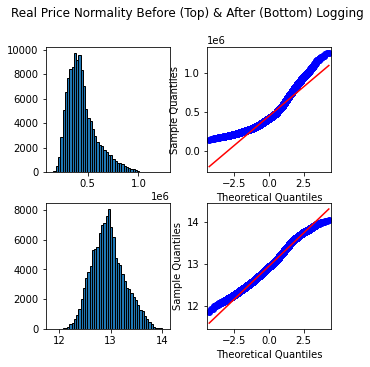

In [84]:
# plot qqplot before and after log transformation

from statsmodels.api import qqplot
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(5,5))

ax1.hist(lr_df['real_price'], bins=50, edgecolor='black')
qqplot(lr_df['real_price'], line='s', ax=ax2)
ax3.hist(np.log(lr_df['real_price']), bins=50, edgecolor='black')
qqplot(np.log(lr_df['real_price']), line='s', ax=ax4)
plt.suptitle('Real Price Normality Before (Top) & After (Bottom) Logging')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()


We will fit the linear regression first and come back to check on the **normality of the residuals** as well as **homoscedasticity**.

**Label & Dummy Encoding**

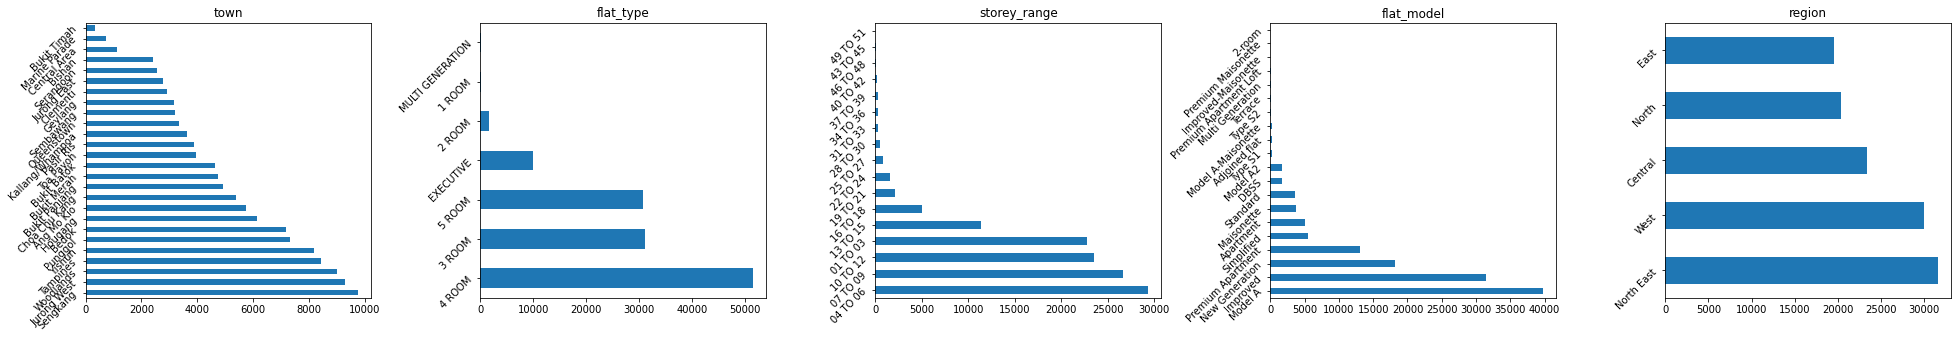

In [85]:
# Frequency plots for catergorical features
fig = plt.figure(figsize=(30,5))
for count, col in enumerate(df.select_dtypes(include=['category','object']).columns):
    fig.add_subplot(1,5,count+1)
    df[col].value_counts().plot.barh()
    plt.title(col)
    plt.yticks(rotation=45)
    plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

In [86]:
# label encode storeys
df = df.sort_values(by='storey_range')
df['storey_range'] = df['storey_range'].astype('category').cat.codes # label encode
lr_df = lr_df.sort_values(by='storey_range')
lr_df['storey_range'] = lr_df['storey_range'].astype('category').cat.codes # label encode

# remove flat types with very few cases
df = df[~df['flat_type'].isin(['MULTI GENERATION', '1 ROOM'])]
lr_df = lr_df[~lr_df['flat_type'].isin(['MULTI GENERATION', '1 ROOM'])]

# Re-categorize flat model to reduce num classes
replace_values = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special', 
                    'Type S1S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
df = df.replace({'flat_model': replace_values})
lr_df = lr_df.replace({'flat_model': replace_values})

# Label encode flat type
replace_values = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, 'EXECUTIVE':4}
df = df.replace({'flat_type': replace_values})
lr_df = lr_df.replace({'flat_type': replace_values})

df = df.reset_index(drop=True)
display(df['flat_model'].value_counts())
lr_df = lr_df.reset_index(drop=True)
display(lr_df['flat_model'].value_counts())

Model A                   46886
Standard                  35066
New Generation            18241
Apartment                 18078
Maisonette                 3670
Special                    2003
Type S1                     278
Model A-Maisonette          217
Type S2                     136
Premium Apartment Loft       38
Improved-Maisonette          19
Premium Maisonette           12
Name: flat_model, dtype: int64

Model A                   46886
Standard                  35066
New Generation            18241
Apartment                 18078
Maisonette                 3670
Special                    2003
Type S1                     278
Model A-Maisonette          217
Type S2                     136
Premium Apartment Loft       38
Improved-Maisonette          19
Premium Maisonette           12
Name: flat_model, dtype: int64

In [87]:
display(lr_df.head())

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,school_dist,hawker_dist,num_hawker_2km,mrt_dist,num_mrt_2km,region,real_price
0,Choa Chu Kang,4,0,142.0,Apartment,1999,0.121844,3.734005,0.0,0.598988,6.0,West,422935.659142
1,Yishun,2,0,104.0,Model A,1988,0.412756,1.463567,2.0,0.712547,2.0,North,359799.728377
2,Yishun,2,0,84.0,Model A,1987,0.483129,1.407925,2.0,0.303205,2.0,North,357772.687653
3,Yishun,2,0,96.0,New Generation,1984,0.318723,0.351337,2.0,0.767705,3.0,North,344596.922952
4,Yishun,1,0,73.0,Model A,1989,0.105293,2.216583,0.0,1.465657,1.0,North,229662.396277


In [88]:
## dummy encoding
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline
df = pd.get_dummies(df, columns=['flat_model'], prefix=['model'])
df= df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline
lr_df = pd.get_dummies(lr_df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline
lr_df = pd.get_dummies(lr_df, columns=['flat_model'], prefix=['model'])
lr_df= lr_df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline

Region and flat_model were dummy encoded, with Central region and Standard model selected as the baseline to which other classes are compared to.

**Feature Scaling**

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit to continuous columns and transform
scaled_columns = ['floor_area_sqm','lease_commence_date','school_dist','hawker_dist','num_hawker_2km',
                    'mrt_dist', 'num_mrt_2km']
scaler.fit(lr_df[scaled_columns])
scaled_columns = pd.DataFrame(scaler.transform(lr_df[scaled_columns]), index=lr_df.index, columns=scaled_columns)

# separate unscaled features
unscaled_columns = lr_df.drop(scaled_columns, axis=1)

# concatenate scaled and unscaled features
lr_df = pd.concat([scaled_columns,unscaled_columns], axis=1)

In [90]:
display(lr_df.head())

,floor_area_sqm,lease_commence_date,school_dist,hawker_dist,num_hawker_2km,mrt_dist,num_mrt_2km,town,flat_type,storey_range,real_price,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,model_Type S1,model_Type S2
0,1.838974,0.454996,-1.166548,1.103993,-0.807782,-0.051059,-0.152648,Choa Chu Kang,4,0,422935.659142,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0.268078,-0.425851,0.038566,-0.318853,-0.105524,0.243633,-0.813187,Yishun,2,0,359799.728377,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.558710,-0.505928,0.330091,-0.353723,-0.105524,-0.818628,-0.813187,Yishun,2,0,357772.687653,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.062637,-0.746159,-0.350970,-1.015870,-0.105524,0.386770,-0.648052,Yishun,2,0,344596.922952,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.013443,-0.345774,-1.235112,0.153049,-0.807782,2.197987,-0.978322,Yishun,1,0,229662.396277,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


**Outlier Detection**

In [113]:
!pip install yellowbrick regressor 
!pip install CooksDistance

from yellowbrick.regressor import CooksDistance
lr_y = lr_df[['real_price']]
lr_X = lr_df.drop(['real_price','town'], axis=1)

yy = np.log(lr_y)['real_price']
XX = lr_X.values

visualizer = CooksDistance()
visualizer.fit(XX, yy)
#visualizer.show()
plt.show()

ERROR: Could not find a version that satisfies the requirement CooksDistance (from versions: none)
ERROR: No matching distribution found for CooksDistance


ImportError: ignored

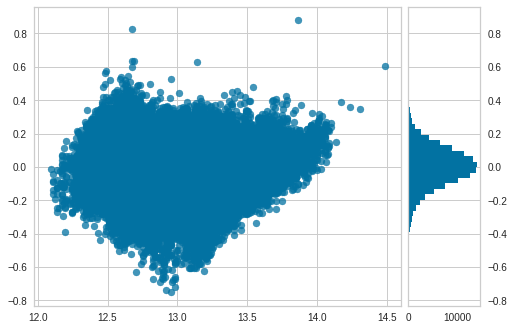

In [107]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

# visualize residuals before outlier removal
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(XX, yy)
#visualizer_residuals.show()
plt.show()

In [108]:
# remove outliers
i_less_influential = (visualizer.distance_ <= visualizer.influence_threshold_)
X_li, y_li = XX[i_less_influential], yy[i_less_influential]
lr_X, lr_y = lr_X[i_less_influential], lr_y[i_less_influential]

# visualize residuals after outliers removal
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li, y_li)
#visualizer_residuals.show()
plt.close()

NameError: ignored

**Linear Regression**

In [114]:
from sklearn.linear_model import LinearRegression

# sklearn method, which doesn't give much additional info

lin_reg = LinearRegression()
lin_reg.fit(lr_X, np.log(lr_y))

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(lr_X, np.log(lr_y))}')

Coefficients: [[ 0.19146783  0.11845048  0.00632483 -0.07081374  0.03071352 -0.03578889
  -0.0102907   0.05717605  0.02582952 -0.16267285 -0.35098237 -0.16489766
  -0.23399009  0.01734881  0.25357326  0.05017171  0.03455296  0.09036383
   0.07090591  0.18206727  0.02703256  0.21120469  0.15651084  0.13429318]]
Intercept: [12.92320078]
R^2 score: 0.8515261844157942


In [115]:
# statsmodel method, which gives more info
import statsmodels.api as sm
# alternate way using statistical formula, which does not require dummy coding manually
# https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables
# https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables

X_constant = sm.add_constant(lr_X)
lin_reg = sm.OLS(np.log(lr_y),X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             real_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 2.978e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:50   Log-Likelihood:                 85566.
No. Observations:              124644   AIC:                        -1.711e+05
Df Residuals:                  124619   BIC:                        -1.708e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           12.9232      0.003   3710.970      0.000      12.916      12.930
floor_area_sqm                   0.1915      0.001    154.219      0.000       0.189       0.194
lease_commence_date              0.1185      0.001    222.691      0.000       0.117       0.119
school_dist                      0.0063      0.000     16.964      0.000       0.006       0.007
hawker_dist                     -0.0708      0.001   -104.346      0.000      -0.072      -0.069
num_hawker_2km                   0.0307      0.001     48.698      0.000       0.029       0.032
mrt_dist                        -0.0358      0.000    -86.307      0.000      -0.037      -0.035
num_mrt_2km                     -0.0103      0.001    -17.479      0.000      -0.011      -0.009
flat_type                        0.0572      0.001     40.026      0.000       0.054       0.060
storey_range                     0.0258      0.000    127.810      0.000       0.025       0.026
region_East                     -0.1627      0.001   -111.076      0.000      -0.166      -0.160
region_North                    -0.3510      0.002   -208.885      0.000      -0.354      -0.348
region_North East               -0.1649      0.002   -108.611      0.000      -0.168      -0.162
region_West                     -0.2340      0.002   -146.654      0.000      -0.237      -0.231
model_Apartment                  0.0173      0.001     13.785      0.000       0.015       0.020
model_Improved-Maisonette        0.2536      0.028      9.059      0.000       0.199       0.308
model_Maisonette                 0.0502      0.002     21.926      0.000       0.046       0.055
model_Model A                    0.0346      0.001     32.653      0.000       0.032       0.037
model_Model A-Maisonette         0.0904      0.008     10.754      0.000       0.074       0.107
model_New Generation             0.0709      0.001     53.049      0.000       0.068       0.074
model_Premium Apartment Loft     0.1821      0.020      9.181      0.000       0.143       0.221
model_Premium Maisonette         0.0270      0.035      0.768      0.442      -0.042       0.096
model_Special                    0.2112      0.003     71.993      0.000       0.205       0.217
model_Type S1                    0.1565      0.008     20.662      0.000       0.142       0.171
model_Type S2                    0.1343      0.011     12.644      0.000       0.113       0.155
==============================================================================
Omnibus:                     4610.019   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8050.037
Skew:                           0.313   Prob(JB):                         0.00
Kurtosis:                       4.076   Cond. No.  

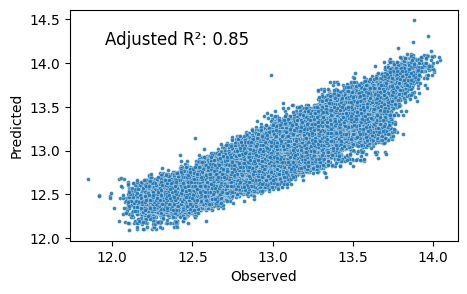

In [117]:
# scatterplot of y (observed) and yhat (predicted)

plt.style.use('default')
fig = plt.figure(figsize=(5,3))
ax = sns.scatterplot(x=np.log(lr_y)['real_price'], y=lin_reg.predict(), edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')#, ax.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000])
ax.set_ylabel('Predicted')#, ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000])
ax.annotate('Adjusted R\u00b2: ' + str(format(round(lin_reg.rsquared_adj,2),'.2f')), xy=(0, 1), xytext=(25, -25),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
plt.show()

Selected features are able to account for 85% of the variance in HDB resale prices

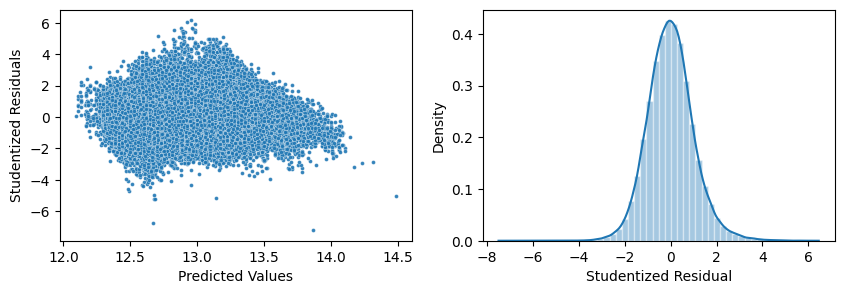

In [119]:
# Homoscedasticity and Normality of Residuals
pred = lin_reg.predict()
resids = lin_reg.resid
resids_studentized = lin_reg.get_influence().resid_studentized_internal

fig = plt.figure(figsize=(10,3))

ax1 = plt.subplot(121)
sns.scatterplot(x=pred, y=resids_studentized, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Studentized Residuals')

ax2 = plt.subplot(122)
sns.distplot(resids_studentized, norm_hist=True, hist_kws=dict(edgecolor='w'))
ax2.set_xlabel('Studentized Residual')

plt.show()

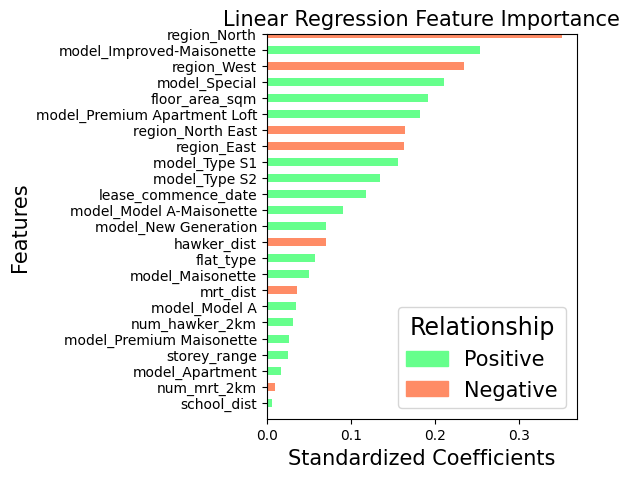

In [120]:
# Feature Importance

lr_results = pd.read_html(lin_reg.summary().tables[1].as_html(),header=0,index_col=0)[0]
coefs = lr_results[['coef']][1:].reset_index().rename(columns={'index':'feature'})
coefs['feature_importance'] = np.abs(coefs['coef'])
coefs = coefs.sort_values('feature_importance').reset_index(drop=True)
coefs['color'] = coefs['coef'].apply(lambda x: '#66ff8c' if x>0 else '#ff8c66')
coefs.plot.barh(x='feature',y='feature_importance',color=coefs['color'],figsize=(4,5))
colors = {'Positive':'#66ff8c', 'Negative':'#ff8c66'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = plt.legend(handles, labels, title='Relationship', fontsize = '15')
plt.setp(legend.get_title(),fontsize='17')
plt.xlabel('Standardized Coefficients', size=15), plt.ylabel('Features', size=15)
plt.ylim([-1,23])
plt.title('Linear Regression Feature Importance', size=15)
plt.show()

**Random Forest**

In [121]:
from sklearn.model_selection import train_test_split

# Train Test Split
y = df[['real_price']]
X = df.drop(['real_price','town', 'year'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state=0)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (112179, 26)
Shape of X_test: (12465, 26)
Shape of y_train: (112179, 1)
Shape of y_test: (12465, 1)


In [122]:
X_test.columns

Index(['flat_type', 'storey_range', 'floor_area_sqm', 'lease_commence_date',
       'school_dist', 'num_school_2km', 'hawker_dist', 'num_hawker_2km',
       'mrt_dist', 'num_mrt_2km', 'dist_dhoby', 'region_East', 'region_North',
       'region_North East', 'region_West', 'model_Apartment',
       'model_Improved-Maisonette', 'model_Maisonette', 'model_Model A',
       'model_Model A-Maisonette', 'model_New Generation',
       'model_Premium Apartment Loft', 'model_Premium Maisonette',
       'model_Special', 'model_Type S1', 'model_Type S2'],
      dtype='object')

Here, I used a ratio of 9:1 for the train and test set and used both Out-Of-Bag and K-fold Cross Validation as validation methods.

**Out-of-bag**

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)
predicted_train = rf.predict(X_train)

print(f'Out-of-bag R\u00b2 score estimate: {rf.oob_score_:>5.3}')

Out-of-bag R² score estimate: 0.959


In [124]:
# predict and get evaluation metrics on test set
predicted_test = rf.predict(X_test)
oob_test_score = r2_score(y_test['real_price'], predicted_test)
spearman = spearmanr(y_test['real_price'], predicted_test)
pearson = pearsonr(y_test['real_price'], predicted_test)
oob_mae = mean_absolute_error(y_test['real_price'], predicted_test)

print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')

Test data R² score: 0.962
Test data Spearman correlation: 0.975
Test data Pearson correlation: 0.981
Test data Mean Absolute Error: 21873


**K-fold Cross Validation**

In [126]:
from sklearn.model_selection import GridSearchCV

# validation by k-fold cross validation with grid search for best hyperparameters
# hyperparameter values shown below are the tuned final values
param_grid = {
    'max_features': ['auto'], # max number of features considered for splitting a node
    'max_depth': [20], # max number of levels in each decision tree
    'min_samples_split': [15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2]} # min number of data points allowed in a leaf node
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 500, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='r2', return_train_score=True)
rfr.fit(X_train,y_train)
print("Best parameters set found on Cross Validation:\n\n", rfr.best_params_)
print("\nCross Validation R\u00b2 score:\n\n", rfr.best_score_.round(3))

Best parameters set found on Cross Validation:

 {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15}

Cross Validation R² score:

 0.963


In [127]:
# predict and get evaluation metrics for test set

cv_predicted_test = rfr.predict(X_test)

cv_test_score = r2_score(y_test['real_price'], cv_predicted_test)
spearman = spearmanr(y_test['real_price'], cv_predicted_test)
pearson = pearsonr(y_test['real_price'], cv_predicted_test)
cv_mae = mean_absolute_error(y_test['real_price'], cv_predicted_test)

print(f'Test data R\u00b2 score: {cv_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(cv_mae)}')

Test data R² score: 0.966
Test data Spearman correlation: 0.977
Test data Pearson correlation: 0.983
Test data Mean Absolute Error: 20879


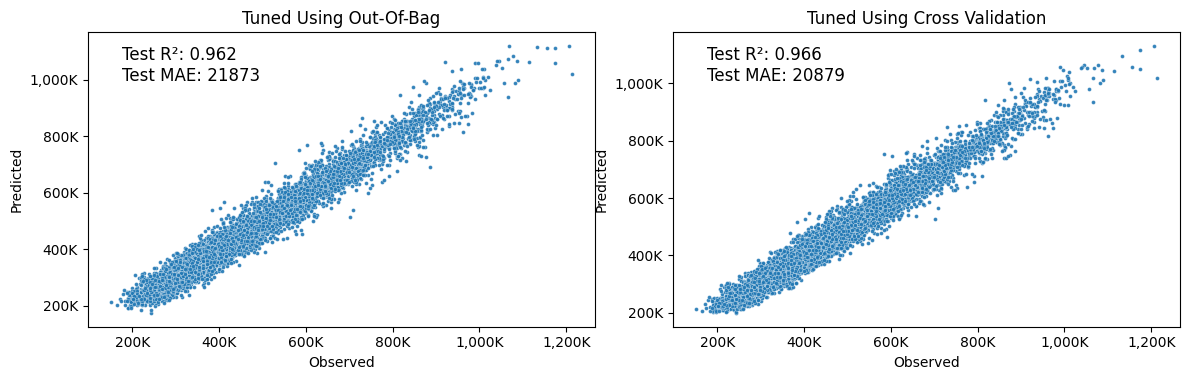

In [129]:
# scatterplots of y (observed) and yhat (predicted)

fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=y_test['real_price'], y=predicted_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_test_score,3)) + '\nTest MAE: ' + str(round(oob_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=y_test['real_price'], y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_test_score,3)) + '\nTest MAE: ' + str(round(cv_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

**Feature Importance**

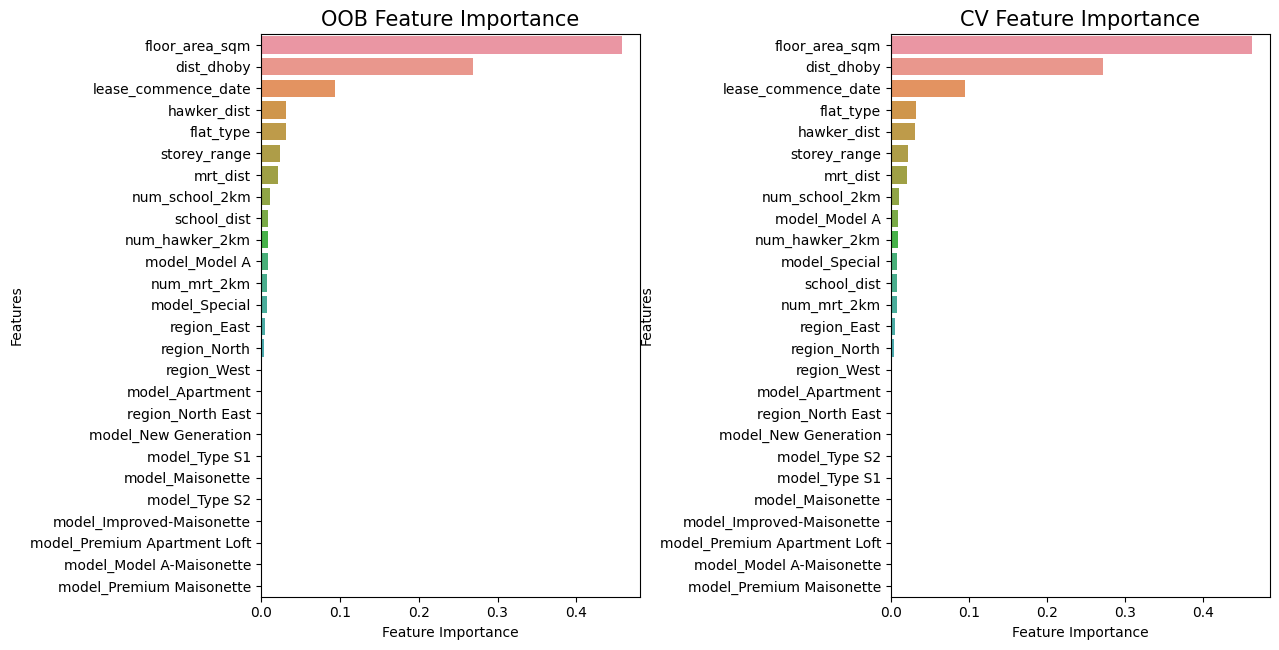

In [130]:
fig = plt.figure(figsize=(14,7))

ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance', size=15)

ax2 = plt.subplot(122)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance', size=15)

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
fig.show()

Feature importance are a bit different from teh linear regression model. Floor area and lease commence date are still one of the main drivers of HDB resale prices. In addition, features like distance from Dhoby Ghaut MRT and flat type also appears to be good drivers.

Tree-based models seem to give lower importance to categorical values. This is due to the importance score being a measure of how often the feature was selected for splitting and how much gain in purity was achieved as a result of the selection.

In [132]:
!pip install shap
import shap
shap.initjs()

explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[16]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[16]])

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=522f4e859efa62b80f5968c4a885135f77f8d6097e6113b13917331ad1332864
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [136]:
!pip install shap
import shap
explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[5]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[5]])

**Flats with predicted medium resale price**

In [134]:
explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[1]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[1]])

In [137]:
explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[100]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[100]])

**Flats with predicted high resale price**

In [138]:
explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[172]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[172]])

In [139]:
explainer = shap.TreeExplainer(rfr.best_estimator_)
shap_values = explainer.shap_values(X_test.iloc[[10084]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[10084]])

In [140]:
print("Flat Type Encoding = 2 ROOM:0, 3 ROOM:1, 4 ROOM:2, 5 ROOM:3, EXECUTIVE:4")

Flat Type Encoding = 2 ROOM:0, 3 ROOM:1, 4 ROOM:2, 5 ROOM:3, EXECUTIVE:4


In [141]:
# Save model

# import pickle
import joblib

# pickle.dump(rfr.best_estimator_, open('hdb_prices_rf_model.sav', 'wb'))
joblib.dump(rfr.best_estimator_, 'rf_compressed.pkl', compress=3) # smaller size

['rf_compressed.pkl']

**Conclusion**

In this project, linear regression and random forest were used to looked at the drivers of HDB resale prices. Linear regression is powerful because it allowns one to interpret the results of the model by looking at its coefficients for every feature. Random forest is a powerful non-linear machine learning model which uses boostrp aggregating (bagging) and ensembling methods.